In [1]:
# -*- coding: utf-8 -*-

# In this script we use a simple classifer called naive bayes and try to predict the violations. But before that we use
# some methods to tackle the problem of our skewed dataset. :) 

# 11 May 2016
# @author: reyhane_askari
# Universite de Montreal, DIRO

import csv
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
from os import chdir, listdir
from pandas import read_csv
from os import path
from random import randint, sample, seed
from collections import OrderedDict
from pandas import DataFrame, Series
import numpy as np 
import csv
import codecs
import matplotlib as mpl
import seaborn as sns
sns.set()
import itertools
from sklearn.decomposition import PCA
from unbalanced_dataset import UnderSampler, NearMiss, CondensedNearestNeighbour, OneSidedSelection,\
NeighbourhoodCleaningRule, TomekLinks, ClusterCentroids, OverSampler, SMOTE,\
SMOTETomek, SMOTEENN, EasyEnsemble, BalanceCascade

almost_black = '#262626'

%matplotlib inline

ImportError: No module named unbalanced_dataset

In [ ]:
colnames = ['old_index','job_id', 'task_idx','sched_cls', 'priority', 'cpu_requested',
            'mem_requested', 'disk', 'violation'] 

tain_path = r'/Users/reyhane.askari/Dropbox/Project_step_by_step/3_create_database/csvs/frull_db_2.csv'

X = pd.read_csv(tain_path, header = None, index_col = False ,names = colnames, skiprows = [0],  usecols = [3,4,5,6,7])
y = pd.read_csv(tain_path, header = None, index_col = False ,names = colnames, skiprows = [0],  usecols = [8])
y = y['violation'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.333, random_state=0)
x = X.values

In [8]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(x)
# Plot the original data
# Plot the two classes
palette = sns.color_palette()

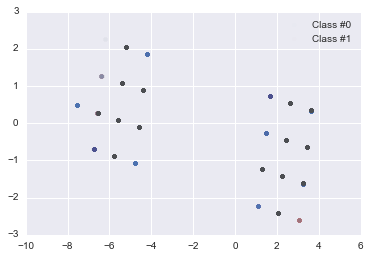

In [9]:
plt.scatter(x_vis[y==0, 0], x_vis[y==0, 1], label="Class #0", alpha=0.009, 
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(x_vis[y==1, 0], x_vis[y==1, 1], label="Class #1", alpha=0.009, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()

In [11]:
# Generate the new dataset using under-sampling method
verbose = False
# 'Random under-sampling'
US = UnderSampler(verbose=verbose)
usx, usy = US.fit_transform(x, y)
X_train, X_test, y_train, y_test = train_test_split(usx, usy, test_size=.333, random_state=0)

0.550384010364


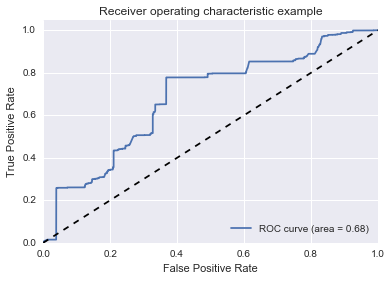

Number of mislabeled points out of a total 10807 points : 4859


In [12]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
gnb = GaussianNB() #Guassian Naive Bayes
# gnb = BernoulliNB() #Bernoulli Naive Bayes
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_score = gnb.fit(X_train, y_train).predict_proba(X_test)[:,1]
mean_accuracy = gnb.fit(X_train, y_train).score(X_test,y_test,sample_weight=None)
# print(y_score)
print(mean_accuracy)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

plt.legend(loc="lower right")

plt.savefig('/Users/reyhane.askari/Dropbox/Project_step_by_step/3_create_database/naive_bays_guassian.png')

plt.show()


print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0],(y_test != y_pred).sum()))
from sklearn import metrics
# metrics.precision_score(y_test, y_pred)

0.634681225132


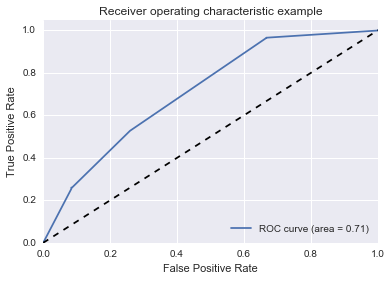

Number of mislabeled points out of a total 10807 points : 3948


In [13]:
gnb = BernoulliNB() #Bernoulli Naive Bayes
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_score = gnb.fit(X_train, y_train).predict_proba(X_test)[:,1]
mean_accuracy = gnb.fit(X_train, y_train).score(X_test,y_test,sample_weight=None)
# print(y_score)
print(mean_accuracy)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.savefig('/Users/reyhane.askari/Dropbox/Project_step_by_step/3_create_database/naive_bayes_bernoulli.png')
plt.show()
print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0],(y_test != y_pred).sum()))

The scores.mean is : 0.949940


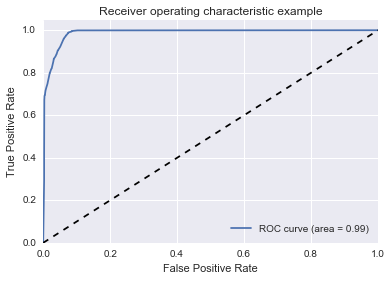

Number of mislabeled points out of a total 10807 points : 479
The mean accuracy is : 0.954937


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, X_test, y_test)
print("The scores.mean is : %f" %scores.mean())

y_pred = clf.fit(X_train, y_train).predict(X_test)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]


mean_accuracy = clf.fit(X_train, y_train).score(X_test,y_test,sample_weight=None)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.savefig('/Users/reyhane.askari/Dropbox/Project_step_by_step/3_create_database/random_forest.png')
plt.show()
print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0],(y_test != y_pred).sum()))
print("The mean accuracy is : %f" %mean_accuracy)

In [15]:
from sklearn import metrics
metrics.precision_score(y_test, y_pred)

0.93063889869396399

In [16]:
metrics.recall_score(y_test, y_pred)

0.98395222989363684

In [17]:
metrics.f1_score(y_test, y_pred)

0.95655328798185946

In [18]:
 metrics.fbeta_score(y_test, y_pred, beta=0.5)  

0.94083431467009238

In [19]:
 metrics.fbeta_score(y_test, y_pred, beta=1)  

0.95655328798185946

In [20]:
metrics.fbeta_score(y_test, y_pred, beta=2)

0.97280643494945018

In [21]:
metrics.precision_recall_fscore_support(y_test, y_pred, beta=0.5) 

(array([ 0.98327174,  0.9306389 ]),
 array([ 0.92786344,  0.98395223]),
 array([ 0.97166692,  0.94083431]),
 array([5448, 5359]))